In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_cleaned = pd.read_csv('data/data_cleaned.csv')
data_cleaned['Start Date'] = pd.to_datetime(data_cleaned['Start Date'], errors='coerce')
data_cleaned['End Date'] = pd.to_datetime(data_cleaned['End Date'], errors='coerce')
data_cleaned['Transaction Date (Pacific Time)'] = pd.to_datetime(data_cleaned['Transaction Date (Pacific Time)'], errors='coerce')
data_cleaned['Total Duration (hh:mm:ss)'] = pd.to_timedelta(data_cleaned['Total Duration (hh:mm:ss)'])
data_cleaned['Charging Time (hh:mm:ss)'] = pd.to_timedelta(data_cleaned['Charging Time (hh:mm:ss)'])
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169443 entries, 0 to 169442
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype          
---  ------                           --------------   -----          
 0   Station Name                     169443 non-null  object         
 1   MAC Address                      169443 non-null  object         
 2   Org Name                         169443 non-null  object         
 3   Start Date                       169443 non-null  datetime64[ns] 
 4   Start Time Zone                  169443 non-null  object         
 5   End Date                         169405 non-null  datetime64[ns] 
 6   End Time Zone                    169443 non-null  object         
 7   Transaction Date (Pacific Time)  169405 non-null  datetime64[ns] 
 8   Total Duration (hh:mm:ss)        169443 non-null  timedelta64[ns]
 9   Charging Time (hh:mm:ss)         169443 non-null  timedelta64[ns]
 10  Energy (kWh)                    

In [3]:
data_cleaned

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 05:21:00,PDT,2016-08-01 06:49:00,PDT,2016-08-01 06:49:00,0 days 01:27:58,0 days 01:25:26,...,-122.146065,USD,0.00,Plug Out at Vehicle,1665,94587.0,523487.0,Santa Clara County,1.427410e+11,CT4020-HD-GW
1,PALO ALTO CA / CAMBRIDGE #2,0024:B100:0002:13B7,City of Palo Alto,2016-08-01 06:01:00,PDT,2016-08-01 10:58:00,PDT,2016-08-01 10:58:00,0 days 04:56:27,0 days 02:31:04,...,-122.146065,USD,0.00,Plug Out at Vehicle,1771,95030.0,141845.0,Santa Clara County,1.428410e+11,CT4020-HD-GW
2,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 06:03:00,PDT,2016-08-01 09:15:00,PDT,2016-08-01 09:15:00,0 days 03:12:17,0 days 03:11:18,...,-122.146065,USD,0.00,Plug Out at Vehicle,1666,80525.0,203603.0,Santa Clara County,1.427410e+11,CT4020-HD-GW
3,PALO ALTO CA / HAMILTON #2,0024:B100:0002:1331,City of Palo Alto,2016-08-01 06:10:00,PDT,2016-08-01 08:54:00,PDT,2016-08-01 08:54:00,0 days 02:44:25,0 days 02:25:49,...,-122.159904,USD,0.00,Plug Out at Vehicle,2093,94539.0,126575.0,Santa Clara County,1.427410e+11,CT4020-HD-GW
4,PALO ALTO CA / HIGH #1,0024:B100:0002:10FE,City of Palo Alto,2016-08-01 06:13:00,PDT,2016-08-01 09:33:00,PDT,2016-08-01 09:33:00,0 days 03:19:24,0 days 03:19:15,...,-122.162849,USD,0.00,Plug Out at Vehicle,3112,94024.0,191743.0,Santa Clara County,1.422410e+11,CT4020-HD-GW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169438,PALO ALTO CA / CAMBRIDGE #5,0024:B100:0002:9B7F,City of Palo Alto,2020-12-31 15:51:00,PST,2020-12-31 17:30:00,PST,2020-12-31 17:31:00,0 days 01:38:27,0 days 01:21:36,...,-122.145981,USD,0.58,Plug Out at Vehicle,4672,94303.0,2652881.0,Santa Clara County,1.742410e+11,CT4020-HD
169439,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 16:48:00,PST,2020-12-31 20:31:00,PST,2020-12-31 20:32:00,0 days 03:43:01,0 days 02:14:04,...,-122.158272,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661.0,Santa Clara County,1.336410e+11,CT4020-HD-GW
169440,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,2020-12-31 17:28:00,PST,2021-01-01 10:56:00,PST,2021-01-01 10:57:00,0 days 17:28:14,0 days 05:08:12,...,-122.113510,USD,6.82,Plug Out at Vehicle,455,94306.0,449995.0,Santa Clara County,2.002410e+11,CT4010-HD-GW
169441,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 17:49:00,PST,2020-12-31 21:55:00,PST,2020-12-31 21:56:00,0 days 04:05:34,0 days 03:53:42,...,-122.158272,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075.0,Santa Clara County,1.336410e+11,CT4020-HD-GW


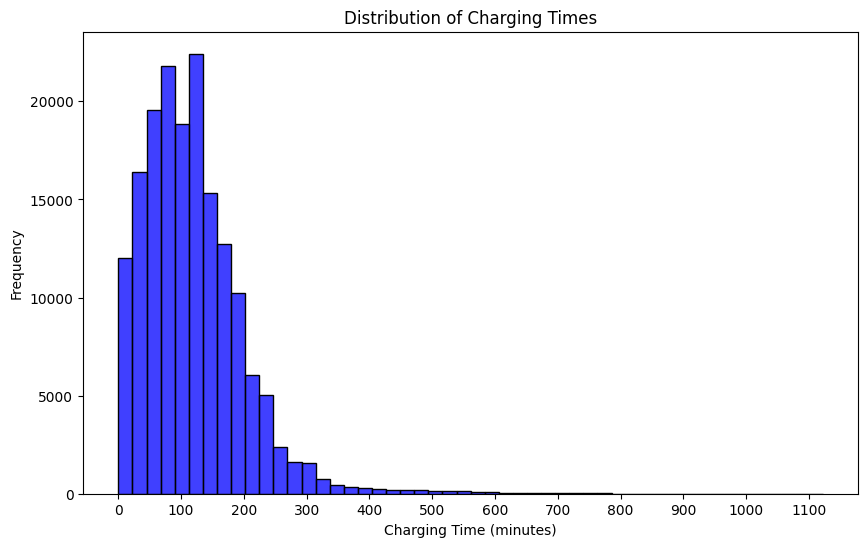

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert 'Charging Time (hh:mm:ss)' to total number of minutes
charging_time_minutes = data_cleaned['Charging Time (hh:mm:ss)'].dt.total_seconds() / 60

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram of charging times
sns.histplot(charging_time_minutes, bins=50, color='blue')

# Set the x-axis ticks
plt.xticks(np.arange(0, charging_time_minutes.max(), 100))

plt.title('Distribution of Charging Times')
plt.xlabel('Charging Time (minutes)')
plt.ylabel('Frequency')
plt.show()

In [13]:
import folium

# Find unique combinations of 'Latitude' and 'Longitude'
unique_locations = data_cleaned[['Latitude', 'Longitude']].drop_duplicates()

# Create a map centered at the mean latitude and longitude values
m = folium.Map(location=[data_cleaned['Latitude'].mean(), data_cleaned['Longitude'].mean()], zoom_start=13)

# Add a marker for each unique charger location
for idx, row in unique_locations.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(m)

# Display the map
m